In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()


In [2]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train,x_test,y_train,y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)

print(f'accuracy:{round(accuracy_score(y_test,lr_pred),4)}, roc_auc:{round(roc_auc_score(y_test,lr_pred),4)}')

accuracy:0.9766, roc_auc:0.9716


In [5]:
# 과제_1011_1
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']
#여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가(최적화 방안)
# accuracy, roc_auc
# 특정 solver가 최적화에 상대적으로 많은 반복 횟수가 필요할 수 있어 max_iter를 600으로 설정
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(x_train,y_train)
    lr_preds = lr_clf.predict(x_test)
    
    print(f'solver = {solver}, accuracy:{round(accuracy_score(y_test,lr_preds),4)}, roc_auc:{round(roc_auc_score(y_test,lr_preds),4)}')

solver = lbfgs, accuracy:0.9766, roc_auc:0.9716
solver = liblinear, accuracy:0.9825, roc_auc:0.9795
solver = newton-cg, accuracy:0.9766, roc_auc:0.9716
solver = sag, accuracy:0.9825, roc_auc:0.9795
solver = saga, accuracy:0.9825, roc_auc:0.9795


In [6]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [7]:
# 과제_1011_2 GridSearchCV를 이용하여 최적 하이퍼파라미터 및 최적 평균 정확도를 구하세요.
# C(Cost Function)값이 작으면 훈련을 덜 복잡하게(강한 규제), 크면 훈련을 더 복잡하게(약한 규제)
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

params = {'solver':['lbfgs','liblinear']
         ,'penalty':['l2','l1'],
         'C':[0.01,0.1,1,5,10]}

lr_clf = LogisticRegression()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)


grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_},\n최적 평균 정확도 : {round(grid_clf.best_score_,4)}')


최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'},
최적 평균 정확도 : 0.9789


## 회귀트리

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd


In [9]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target

bostonDF.head()
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)


In [13]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf,x_data,y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'{np.round(neg_mse_scores,2)}')
print(np.round(rmse_scores,2))
print(np.round(avg_rmse,2))

[ -7.88 -13.14 -20.57 -46.23 -18.88]
[2.81 3.63 4.54 6.8  4.34]
4.42


In [14]:
# 과제_1011_3 회기트리 모델들을 이용하여 모델링 및 평가를 수행하세요.
# (def get_model_cv_prediction(model,x_data,y_target))
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

def get_model_cv_prediction(model, x_data, y_target):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print(f'5 교차 검증의 평균 RMSE : {round(avg_rmse,4)}')

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]

for model in models:
    get_model_cv_prediction(model, x_data, y_target)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE : 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE : 4.4225
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE : 4.269
#### XGBRegressor ####
5 교차 검증의 평균 RMSE : 4.2511
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 4.6464


## Regression 실습 - Bike Sharing Demand

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [16]:
bike_df = pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()
# 날씨와 날짜에 따른 자전거 대여 수, 수요

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [18]:
# 문자열 datetime을 datetime 타입으로 변환
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head(4)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3


In [19]:
# casual은 사전 등록하지 않은 사용자, register은 등록된 사용자 수 
# casual + register = count 위 두개 컬럼 따로 필요하지 않음
# datetime과 함께 삭제

drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)


In [20]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

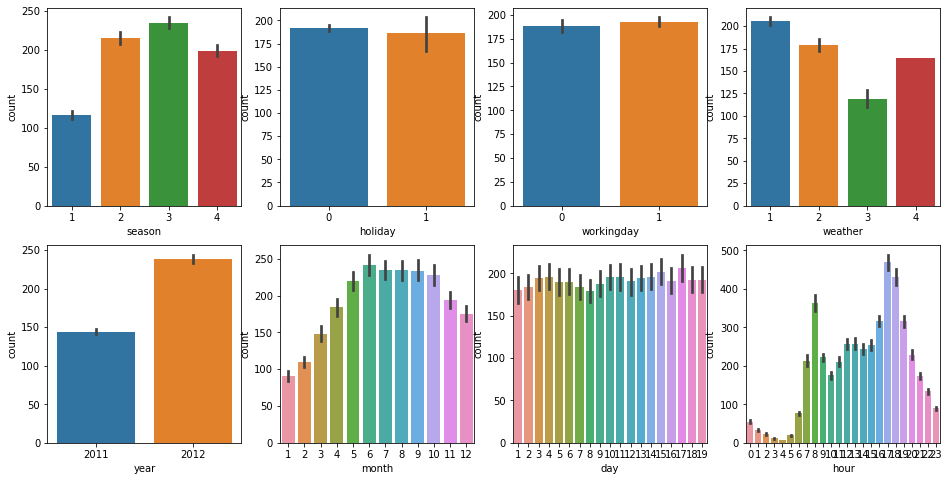

In [21]:
fig,axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features =['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']
for i, feature in enumerate(cat_features):
    row=int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

<AxesSubplot:>

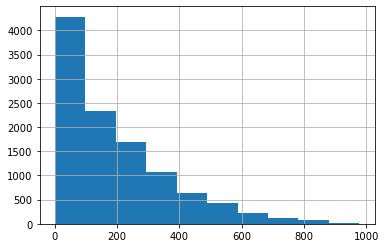

In [22]:
bike_df['count'].hist()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
# log값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error =(log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
# 사이킷런의 mean_squared_error를 이요해 rmse 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print(f'RMSLE:{round(rmsle_val,3)}, RMSE:{round(rmse_val,3)}, MAE:{round(mae_val,3)}')

In [25]:
# 로그변환, 모델/학습/예측/평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

y_target = bike_df['count']
x_features = bike_df.drop(['count'],axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
pred = lr_reg.predict(x_test)

evaluate_regr(y_test,pred)

RMSLE:1.165, RMSE:140.9, MAE:105.924


<AxesSubplot:>

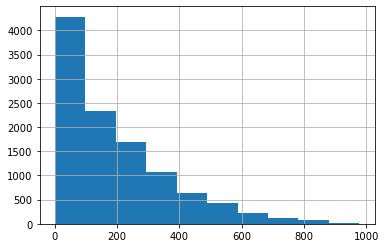

In [26]:
bike_df['count'].hist()

<AxesSubplot:>

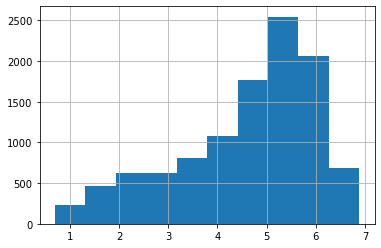

In [27]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [28]:
# 과제_1011_4. 상기 사례에 대하여 로그변환을 수행한 후 모델링 및 평가를 수행하세요.(LinearRegression 적용)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
x_features = bike_df.drop(['count'], axis=1, inplace=False)

# 타깃 칼럼 log1p로 로그변환
y_target_log = np.log1p(y_target)

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target_log
                                                   ,test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

# 로그변환된 테스트 데이터와 예측값을 expm1 함수를 이용해 원래 스케일로 되돌려 줌
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE:1.017, RMSE:162.594, MAE:109.286


<AxesSubplot:>

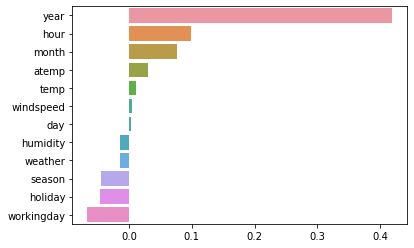

In [29]:
coef = pd.Series(lr_reg.coef_, index=x_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y= coef_sort.index)
# year, hour, month, season, holiday, workingday 피처들의 회귀 계수 영향도가 상대적으로 높다. 
# 각 피처들은 숫자 값을 가지고 있지만 의미를 담고 있는 카테고리형 피처이다.
# 이러한 경우, 예측모델에 적용하기 위해선 원핫인코딩을 통해 변환이 필요하다.

In [30]:
x_features.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [48]:
# 과제_1011_5. 상기 사례에 대하여 추가로 카테고리형 변수에 대하여 인코딩 적용 후, 모델링 및 평가를 수행하세요.
#(lr, ridge, lasso 적용)
# 원핫인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
x_features_ohe = pd.get_dummies(x_features, columns=['day','hour','holiday','workingday','season','weather','year','month'])
y_target_log = np.log1p(y_target)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_features_ohe, y_target_log, test_size=0.3, random_state=0)
# 모델과 학습/예측 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=False):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    if is_expm1:
        y_test=np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
#모델 별, 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predict(model, x_train, x_test,y_train,y_test, is_expm1=True)

### LinearRegression ###
RMSLE:0.59, RMSE:97.687, MAE:63.382
### Ridge ###
RMSLE:0.59, RMSE:98.529, MAE:63.893
### Lasso ###
RMSLE:0.635, RMSE:113.218, MAE:72.802


In [50]:
x_features_ohe.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1', 'season_1',
       'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'year_2011', 'year_2012', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

<AxesSubplot:>

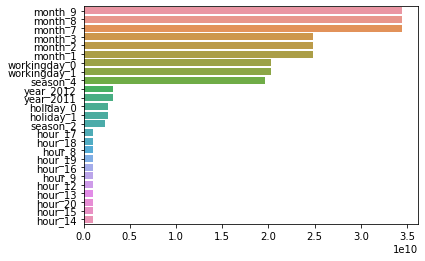

In [55]:
coef = pd.Series(lr_reg.coef_, index=x_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y= coef_sort.index)

In [35]:
# 과제_1011_6. 회귀 트리 모델들을 적용하여 모델링 및 평가를 수행하세요.
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    #XGBoost의 경우 DataFrame이 입력될 경우, 버전에 따라 오류 발생 가능, ndarray로 변환
    get_model_predict(model, x_train.values, x_test.values, y_train.values, y_test.values, is_expm1=True)


### RandomForestRegressor ###
RMSLE:0.354, RMSE:50.228, MAE:31.1
### GradientBoostingRegressor ###
RMSLE:0.33, RMSE:53.359, MAE:32.749
### XGBRegressor ###
RMSLE:0.342, RMSE:51.732, MAE:31.251
### LGBMRegressor ###
RMSLE:0.319, RMSE:47.215, MAE:29.029
